# Independent project- Week Four


# Introduction

In this project, we will be conducting a hypothesis testing on the data provided by Autolib below.

Datalink:/content/autolib_daily_events_postal_code.csv

# 1. Reading the data

In [32]:

# Importing the libraries
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv("/content/autolib_daily_events_postal_code.csv")
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# 2. Checking our data

In [33]:
# Determine the number of records in our dataset
df.shape

(16085, 13)

In [34]:
# Checking for appropriate datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# 3. Cleaning our data

In [169]:
# Renaming column heads
df.rename(columns={'dayOfWeek': 'Day of the Week', 'n_daily_data_points': 'Daily points'})

,Postal code,date,Daily points,Day of the Week,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,1,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,1,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,1,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,1,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,1,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,1,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,0,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,0,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,1,11,14,3,5,2,2,0,0


In [171]:
# Checking for anomalies
print(df.nunique())

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64


In [170]:
# # Identifying missing data
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [38]:
# Checking for outliers using IQR
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3 - q1
print(iqr)

Postal code               2070.0
n_daily_data_points          1.0
dayOfWeek                    4.0
BlueCars_taken_sum         115.0
BlueCars_returned_sum      115.0
Utilib_taken_sum             4.0
Utilib_returned_sum          4.0
Utilib_14_taken_sum          9.0
Utilib_14_returned_sum       9.0
Slots_freed_sum              5.0
Slots_taken_sum              5.0
dtype: float64


In [172]:
# Output of outliers
print(df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))

       BlueCars_returned_sum  BlueCars_taken_sum  ...  day_type  n_daily_data_points
0                      False               False  ...     False                False
1                      False               False  ...     False                False
2                      False               False  ...     False                False
3                      False               False  ...     False                 True
4                      False               False  ...     False                False
...                      ...                 ...  ...       ...                  ...
16080                  False               False  ...     False                False
16081                  False               False  ...     False                False
16082                  False               False  ...     False                False
16083                  False               False  ...     False                False
16084                  False               False  ...     False  

TypeError: ignored

In [175]:
# Displaying the columns and rows after dropping outliers
df2 = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]
df2.shape

(9783, 13)

# 4. Univariate analysis

> a) Categorical variables



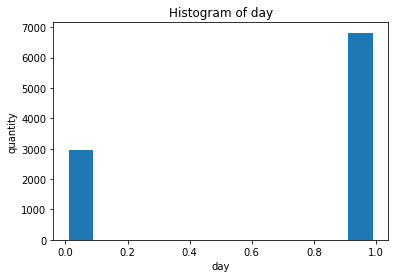

In [181]:
# # Creating a histogram using values from the day_type column
df2_day = df2['day_type']

plt.hist(df2_day, bins=10, histtype='bar', rwidth=0.8)
plt.xlabel('day')
plt.ylabel('quantity')
plt.title('Histogram of day')
plt.show()
# Most events happen during the weekdays compared to weekends

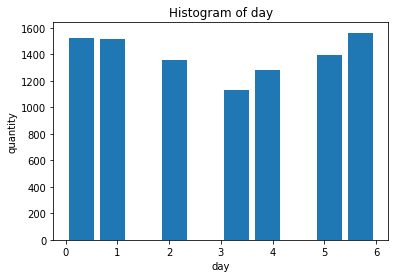

In [182]:
# Creating histogram of day of the week

df_day = df2['dayOfWeek']

plt.hist(df_day, bins=10, histtype='bar', rwidth=0.8)
plt.xlabel('day')
plt.ylabel('quantity')
plt.title('Histogram of day')
plt.show()
# Monday, Tuesday and Sundays are relatively busy than other days of the week

# Numerical variables

In [183]:
# Measures of central tendancies and dispersion
df2.describe()

,Postal code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000
mean,93104.755188,1439.698457,2.979454,0.697128,49.242870,49.222324,1.498518,1.494327,3.567106,3.568231,0.697434,0.694981
std,1012.235885,0.564981,2.074932,0.459524,46.303795,46.223838,1.909304,1.891761,3.895220,3.898348,1.833390,1.828739
min,91330.000000,1438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92270.000000,1440.000000,1.000000,0.000000,17.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,93110.000000,1440.000000,3.000000,1.000000,34.000000,34.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,94100.000000,1440.000000,5.000000,1.000000,67.000000,67.000000,2.000000,2.000000,5.000000,5.000000,0.000000,0.000000
max,95880.000000,1440.000000,6.000000,1.000000,293.000000,301.000000,10.000000,10.000000,23.000000,23.000000,12.000000,12.000000


In [184]:
# Calculating the median
df2.median()
# The mode, median and the mean of blue cars taken are significantly different
#  indicating that our population is skewed hence not normally distributed.

Postal code               93110.0
n_daily_data_points        1440.0
dayOfWeek                     3.0
day_type                      1.0
BlueCars_taken_sum           34.0
BlueCars_returned_sum        34.0
Utilib_taken_sum              1.0
Utilib_returned_sum           1.0
Utilib_14_taken_sum           2.0
Utilib_14_returned_sum        2.0
Slots_freed_sum               0.0
Slots_taken_sum               0.0
dtype: float64

In [185]:
# Calculating the mode
df2["BlueCars_returned_sum"].mode()

0    13
dtype: int64

# 5. Bivariate analysis

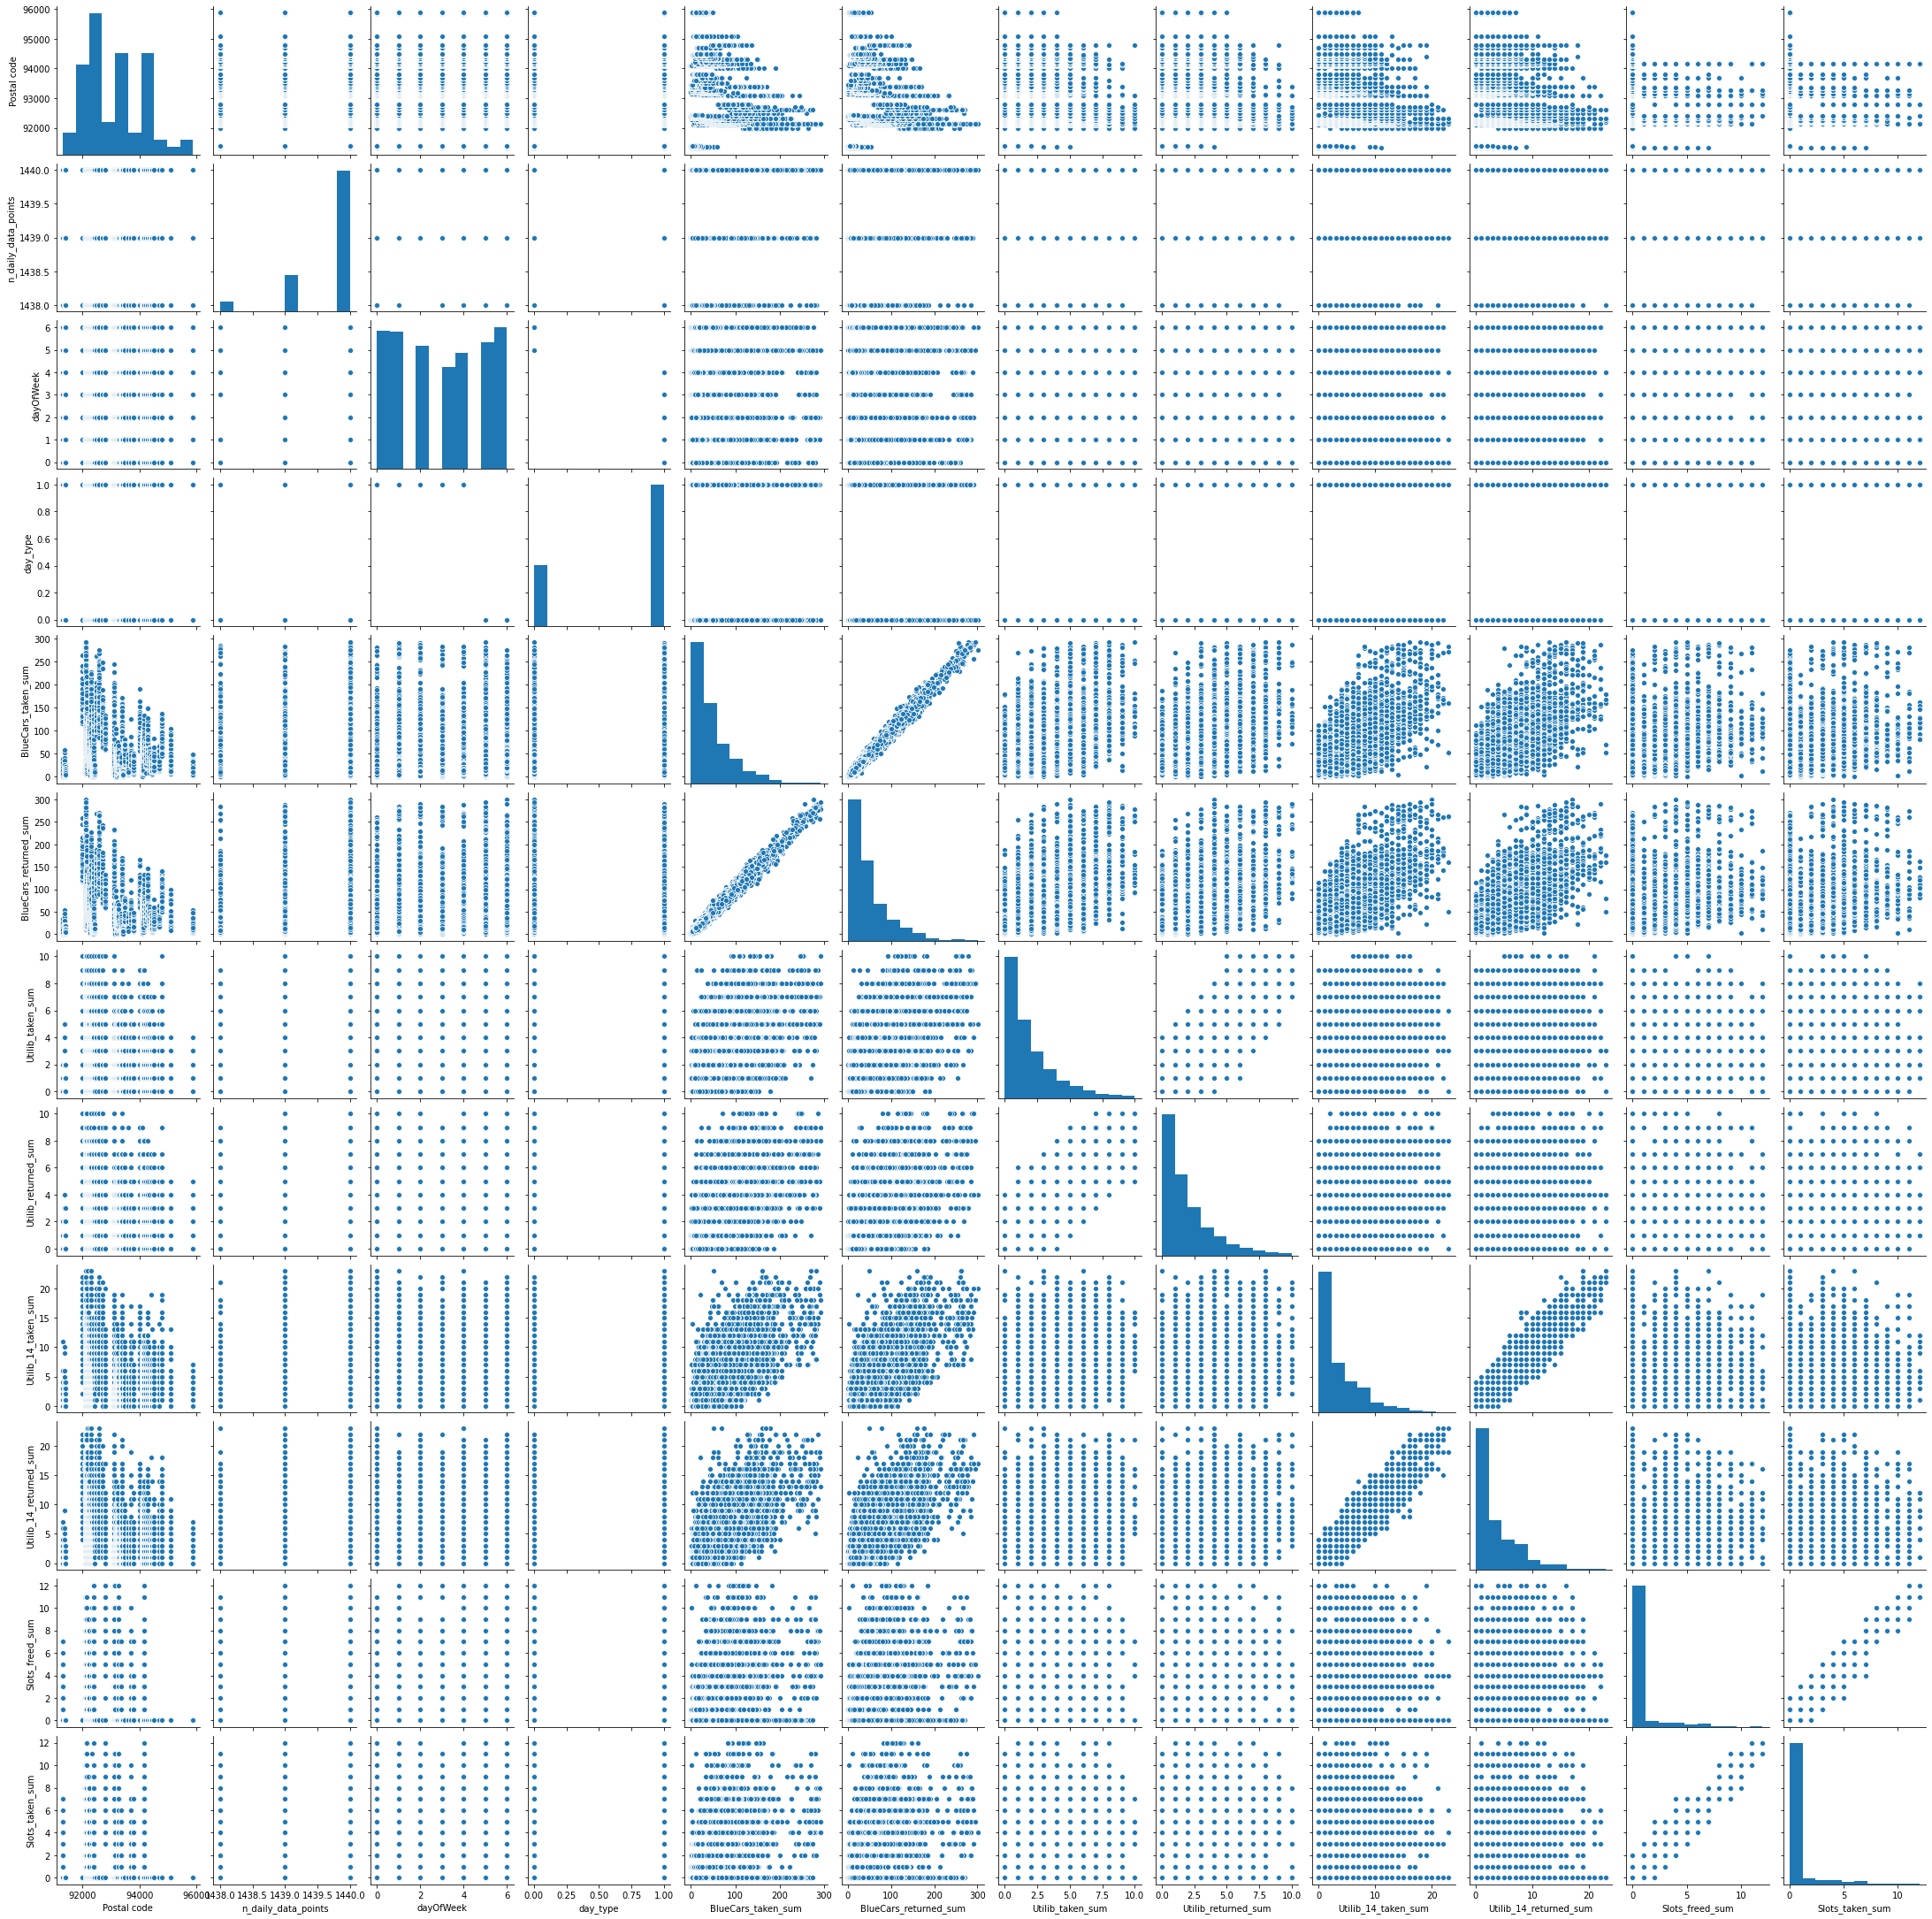

In [187]:
# Ploting the bivariate summaries
sns.pairplot(df2)
plt.show()

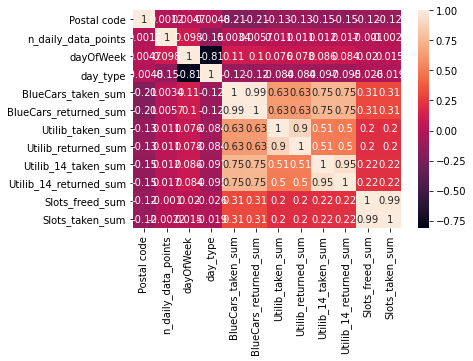

In [188]:
# The summaries of correlation
sns.heatmap(df2.corr(),annot=True)
plt.show()
# The correlation between blue cars taken is higher than utilib and utilib 14 compared to the slots freed


# 6. Sampling

In [164]:
# We will use stratified random sampling methodology by dates
#1.Defining the population
# Our population has been defined above as data from Autolib on the uptake of their electric cars
# 2.Choosing the sample
# Our sample size is 10% of the population
df2.shape
# 3. Selecting the sample
Autolib_sample = df2.groupby('date', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
Autolib_sample.head()
# If we use a sample size of 1%
Autolib_sample2 = df2.groupby('date', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.01))
Autolib_sample2.head()
Autolib_sample2.shape


(130, 13)

In [66]:
Autolib_sample.head(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
13008,94000,2/11/2018,1440,6,weekend,109,110,3,3,4,3,0,0
4263,91400,2/22/2018,1440,3,weekday,6,8,0,0,0,0,0,0
3977,91330,3/23/2018,1440,4,weekday,10,11,0,0,1,0,1,1


# Nomarlty test

In [165]:
# We will use the Shapiro-Wilk test to check whether our data has a normal distribution
# imporing the shapiro function
from scipy.stats import shapiro 
blue = Autolib_sample["BlueCars_returned_sum"]
# testing for normality
stat, p = shapiro(blue)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
# This test shows that the data is not normally distributed

# Testing our smaller sample size
from scipy.stats import shapiro 
bluecar = Autolib_sample2["BlueCars_returned_sum"]
# testing for normality
stat, p = shapiro(bluecar)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
# This test shows that the data is not normally distributed

Statistics=0.808, p=0.000
Sample does not look Gaussian
Statistics=0.852, p=0.000
Sample does not look Gaussian


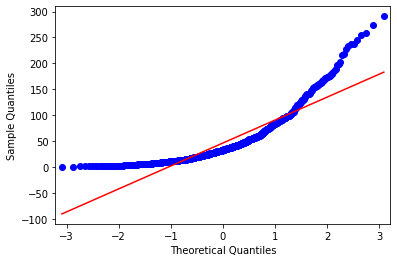

In [189]:
# generate univariate observations
from statsmodels.graphics.gofplots import qqplot

Blue = Autolib_sample["BlueCars_returned_sum"]
# q-q plot
qqplot(Blue, line='s')
plt.show()

In [0]:
# Step two: Converting day_type column into integer
day_type = {
    'weekday': 1,
    'weekend': 0
}
Autolib_sample['day_type'] = Autolib_sample['day_type'].map(day_type)

In [191]:
Autolib_sample.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
11647,93360,1/1/2018,1440,0,1,29,22,1,1,1,1,0,0
8876,92400,1/1/2018,1440,0,1,63,85,0,0,5,6,2,2
6705,92250,1/1/2018,1440,0,1,68,79,1,2,10,10,4,5
7797,92330,1/1/2018,1440,0,1,37,30,0,1,2,3,4,3
14058,94160,1/1/2018,1440,0,1,62,60,2,1,3,3,6,6


In [192]:
from scipy.stats import shapiro 
day = Autolib_sample["day_type"]
# testing for normality
stat, p = shapiro(day)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
# This test shows that the data is not normally distributed

Statistics=0.572, p=0.000
Sample does not look Gaussian


# 7. Hypothesis Testing

Null hypothesis = The average number of bluecars taken is  40 on any given day

Alternative hypothesis = The average number of bluecars taken is not 40 on any given day

Level of significance is 5%.

We reject the null hypothesis if our p-value is greater than the level of significance

In [193]:
Autolib_sample

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
11647,93360,1/1/2018,1440,0,1,29,22,1,1,1,1,0,0
8876,92400,1/1/2018,1440,0,1,63,85,0,0,5,6,2,2
6705,92250,1/1/2018,1440,0,1,68,79,1,2,10,10,4,5
7797,92330,1/1/2018,1440,0,1,37,30,0,1,2,3,4,3
14058,94160,1/1/2018,1440,0,1,62,60,2,1,3,3,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8399,92360,6/9/2018,1440,5,0,4,6,0,0,0,0,0,0
14203,94160,6/9/2018,1440,5,0,107,100,1,1,9,7,11,11
15762,95100,6/9/2018,1440,5,0,44,40,4,5,2,6,0,0
7630,92310,6/9/2018,1440,5,0,79,71,3,2,6,6,0,0


In [198]:
# Point estimation
df2["BlueCars_taken_sum"].mean()
Autolib_sample["BlueCars_taken_sum"].mean()

Difference = df2["BlueCars_taken_sum"].mean() - Autolib_sample["BlueCars_taken_sum"].mean()
print(Difference)
# Using sample size 2
Autolib_sample2["BlueCars_taken_sum"].mean()
Difference2 = df2["BlueCars_taken_sum"].mean() - Autolib_sample2["BlueCars_taken_sum"].mean()
print(Difference2)

3.018870285188598
2.435177977496288


In [196]:
# We use Z-score for the test
zscore = ( 40 - Autolib_sample["BlueCars_taken_sum"].mean() ) / Autolib_sample["BlueCars_taken_sum"].std()
zscore
# Sample size 2

-0.13979458932715663

In [197]:
# Getting the p value
#import norm function from the scipy library
from scipy import stats
from scipy.stats import norm
prob = stats.norm.cdf(zscore)
prob
# Our p-value is greater than our level of significance 
# therefore we fail to reject the null hypothesis and conclude that it is possible that the average number of blue cars taken is 40 on any given day

0.4444111442042312